<h1>Stock Market Prediction And Forecasting Using Stacked LSTM</h1>

In [38]:
# Keras and Tensorflow >2.0

In [39]:
import os
from dotenv import load_dotenv
load_dotenv()
api_key=os.getenv('TIINGO_API_KEY')

ModuleNotFoundError: No module named 'dotenv'

In [ ]:
### Data Collection
import pandas_datareader as pdr

In [ ]:
# df = pdr.get_data_tiingo('AAPL', api_key=api_key)

In [ ]:
# df.to_csv('AAPLNEW.csv')

In [40]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf. __version__)

2.10.1


In [41]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [42]:
df=pd.read_csv('AAPLNEW2.csv')

In [43]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,25.652500,26.342501,25.500000,26.337500,24.111496,270597600
1,2016-01-05,26.437500,26.462500,25.602501,25.677500,23.507288,223164000
2,2016-01-06,25.139999,25.592501,24.967501,25.174999,23.047249,273829600
3,2016-01-07,24.670000,25.032499,24.107500,24.112499,22.074549,324377600
4,2016-01-08,24.637501,24.777500,24.190001,24.240000,22.191278,283192000


In [44]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1729,2022-11-14,148.970001,150.279999,147.429993,148.279999,148.279999,73374100
1730,2022-11-15,152.220001,153.589996,148.559998,150.039993,150.039993,89868300
1731,2022-11-16,149.130005,149.869995,147.289993,148.789993,148.789993,64218300
1732,2022-11-17,146.429993,151.479996,146.149994,150.720001,150.720001,80389400
1733,2022-11-18,152.304993,152.570007,149.970001,151.289993,151.289993,70799117


In [45]:
df1=df.reset_index()['Close']

In [46]:
df1

0        26.337500
1        25.677500
2        25.174999
3        24.112499
4        24.240000
           ...    
1729    148.279999
1730    150.039993
1731    148.789993
1732    150.720001
1733    151.289993
Name: Close, Length: 1734, dtype: float64

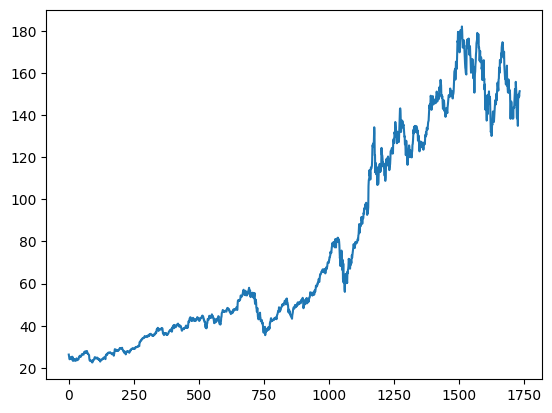

In [47]:

plt.plot(df1)

In [48]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [49]:
df1

0        26.337500
1        25.677500
2        25.174999
3        24.112499
4        24.240000
           ...    
1729    148.279999
1730    150.039993
1731    148.789993
1732    150.720001
1733    151.289993
Name: Close, Length: 1734, dtype: float64

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [51]:
print(df1)

[[0.02353772]
 [0.01939784]
 [0.01624588]
 ...
 [0.79162614]
 [0.8037322 ]
 [0.80730749]]


In [52]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size],df1[training_size:len(df1)]

In [53]:
training_size,test_size

(1127, 607)

In [54]:
train_data

array([[0.02353772],
       [0.01939784],
       [0.01624588],
       ...,
       [0.42109143],
       [0.43310336],
       [0.42295751]])

In [55]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [56]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [57]:
a = np.zeros((1,10))
print(a)
a[0][-1] = 4
print(a)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 4.]]


In [58]:
print(X_train.shape), print(y_train.shape)

(1027, 100)
(1027,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(507, 100)
(507,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
tb_callback=tf.keras.callbacks.TensorBoard(log_dir="logs/",histogram_freq=1)
model.compile(loss='mean_squared_error',optimizer='adam',metrics=[tf.keras.metrics.MeanSquaredError()])


In [63]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1,callbacks=[tb_callback])

Epoch 1/100
17/17 [==============================] - 8s 127ms/step - loss: 0.0074 - mean_squared_error: 0.0074 - val_loss: 0.0841 - val_mean_squared_error: 0.0841
Epoch 2/100
17/17 [==============================] - 1s 46ms/step - loss: 9.1131e-04 - mean_squared_error: 9.1131e-04 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 3/100
17/17 [==============================] - 1s 47ms/step - loss: 4.1029e-04 - mean_squared_error: 4.1029e-04 - val_loss: 0.0026 - val_mean_squared_error: 0.0026
Epoch 4/100
17/17 [==============================] - 1s 46ms/step - loss: 3.7436e-04 - mean_squared_error: 3.7436e-04 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 5/100
17/17 [==============================] - 1s 48ms/step - loss: 2.7296e-04 - mean_squared_error: 2.7296e-04 - val_loss: 0.0029 - val_mean_squared_error: 0.0029
Epoch 6/100
17/17 [==============================] - 1s 47ms/step - loss: 2.6514e-04 - mean_squared_error: 2.6514e-04 - val_loss: 0.0037 - val_mean_squared_e

In [65]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

16/16 [==============================] - 0s 10ms/step


In [66]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [67]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

47.62839222884854

In [68]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

132.24838815519945

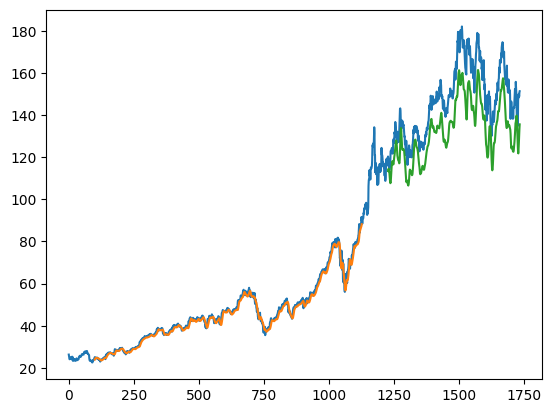

In [69]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+2*look_back:len(train_predict)+2*look_back+len(test_predict), :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [70]:
len(test_data)

607

In [71]:
# print(test_data)
x_input=test_data[507:].reshape(1,-1)



In [72]:
temp_input=list(x_input)
# print(x_input)
temp_input=temp_input[0].tolist()
print(temp_input)

[0.7159166056996482, 0.729778873571369, 0.7462756906702385, 0.754806347933043, 0.7763212175335417, 0.7806491900429466, 0.7670377862201733, 0.7732476405393794, 0.7709268250506965, 0.7896189754334383, 0.8002822781943177, 0.7808374541216861, 0.8054885006865548, 0.8182844426729671, 0.8327740964785724, 0.824870630700847, 0.8177199389736851, 0.8092520635848095, 0.8418064755667298, 0.8453191806885791, 0.8776854289524336, 0.8714128868474302, 0.862004073689925, 0.900392094097967, 0.8983848367165712, 0.8954995175286065, 0.8924886283202416, 0.8928022742431181, 0.9198997000445275, 0.915195293465775, 0.9378391767373795, 0.9446762225416645, 0.9436725969872377, 0.9532068860770113, 0.9506978127821311, 0.9342010897713933, 0.909424567274256, 0.9072918339605918, 0.909173615409719, 0.9248549706722275, 0.8846479506889873, 0.8705975190992008, 0.8551043338273001, 0.8445037188522181, 0.8491454376451733, 0.835659415666537, 0.8276305680446747, 0.8366003534351664, 0.8271915402776613, 0.8454445625327159, 0.883456

In [73]:
print(len(temp_input))

100


In [74]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
#         print("yhat 0 is ",yhat[0])
#         print(type(yhat[0].tolist()))
        temp_input.extend(yhat[0].tolist())
#         print(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

1 day input [0.72977887 0.74627569 0.75480635 0.77632122 0.78064919 0.76703779
 0.77324764 0.77092683 0.78961898 0.80028228 0.78083745 0.8054885
 0.81828444 0.8327741  0.82487063 0.81771994 0.80925206 0.84180648
 0.84531918 0.87768543 0.87141289 0.86200407 0.90039209 0.89838484
 0.89549952 0.89248863 0.89280227 0.9198997  0.91519529 0.93783918
 0.94467622 0.9436726  0.95320689 0.95069781 0.93420109 0.90942457
 0.90729183 0.90917362 0.92485497 0.88464795 0.87059752 0.85510433
 0.84450372 0.84914544 0.83565942 0.82763057 0.83660035 0.82719154
 0.84544456 0.88345616 0.8233025  0.83252314 0.81408185 0.80360672
 0.82731692 0.84249646 0.82254982 0.81640276 0.80191311 0.80404584
 0.8102556  0.79821233 0.75204642 0.72519994 0.75185825 0.77475308
 0.77663477 0.7705504  0.73705504 0.73912499 0.73009252 0.72607809
 0.75524547 0.72632905 0.75160739 0.76001257 0.76070256 0.75775445
 0.78209194 0.79576604 0.81389368 0.79513884 0.76659876 0.83522038
 0.82016622 0.80329307 0.76804142 0.72946532 0.7263

In [75]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
# day_new,day_pred

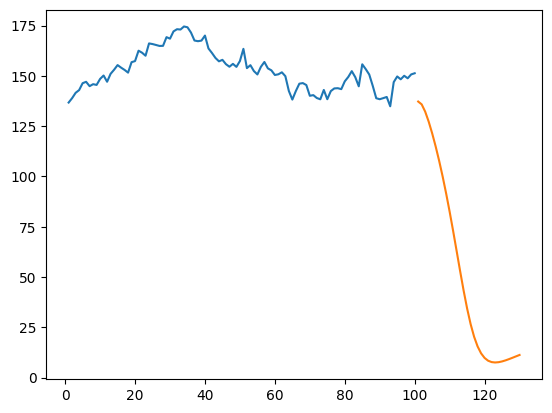

In [76]:
plt.plot(day_new,scaler.inverse_transform(df1[1634:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

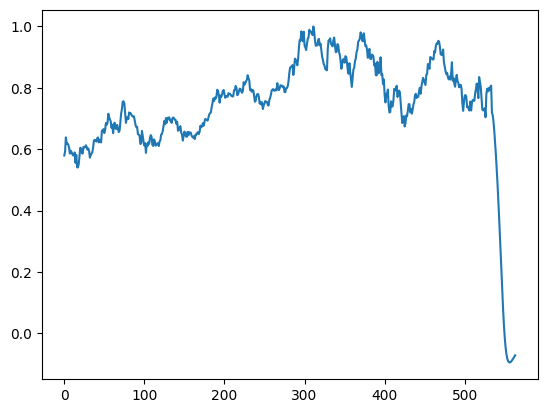

In [77]:
df3=df1.tolist()
df3.extend(lst_output)
# print(len(df3[1200:]))
plt.plot(df3[1200:])

In [78]:
df3=scaler.inverse_transform(df3).tolist()

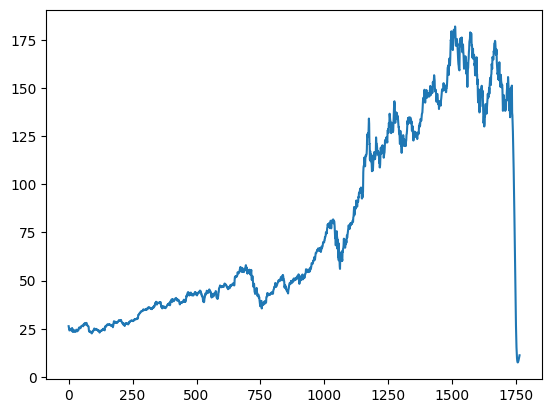

In [79]:
plt.plot(df3)